In [43]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english")
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import re
import string

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [44]:
# Load social media data from CSV file into a Pandas DataFrame
df = pd.read_csv('safaricom_twitter.csv')

# Display the first 5 rows of the DataFrame to verify the data has been loaded successfully
df.head(20)

,text
0,"@SharonChemurgor Hey SharonChemurgor, on it.^HM"
1,@Safaricom_Care Hello @SafaricomPLC @Safaricom...
2,@IvyKutswa Hi Ivy. We are sorry to hear this. ...
3,@Safaricom_Care Check dm please
4,@Safaricom_Care Check dm
5,@Safaricom_Care My Airtime keeps disappearing ...
6,@casapradon @SafaricomPLC Hello casapradon and...
7,@Safaricom_Care No response yet
8,@Safaricom_Care Admin si unipige hata Shout ou...
9,@Safaricom_Care Why is it that after reversing...


In [45]:
# Download the NLTK stopwords list
nltk.download('stopwords')

# Define a function to clean the text data
def clean_text(text):
    # Remove URLs using regular expressions
    text = re.sub(r'http\S+', '', text)

    # Remove punctuation marks and symbols
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Convert the text to lowercase
    text = text.lower()

    # Tokenize the text into individual words or phrases
    tokens = nltk.word_tokenize(text)

    # Remove stopwords
    stopwords_list = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stopwords_list]

    # Return the cleaned text as a string
    return ' '.join(tokens)
    df['clean_text'] = df['text'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
# Remove URLs from the text using regular expressions
df['clean_text'] = df['text'].apply(lambda x: re.sub(r'http\S+', '', x))

# Define a function to stem the text
def stem_words(text):
    stemmer = SnowballStemmer("english")
    tokens = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_words)

# Apply the stem_words function to the tokenized text data
df['stemmed_text'] = df['clean_text'].apply(lambda x: stem_words(x))

# Display a sample of the stemmed data
print(df['stemmed_text'].head())

0    @ sharonchemurgor hey sharonchemurgor , on it.^hm
1    @ safaricom_car hello @ safaricomplc @ safaric...
2    @ ivykutswa hi ivi . we are sorri to hear this...
3                       @ safaricom_car check dm pleas
4                             @ safaricom_car check dm
Name: stemmed_text, dtype: object


In [47]:
# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to lemmatize a list of words
def lemmatize_words(text):
    lemmatized_words = []
    for word in text:
        lemmatized_words.append(lemmatizer.lemmatize(word))
    return lemmatized_words

# Apply the lemmatize_words function to the tokenized text data
df['lemmatized_text'] = df['stemmed_text'].apply(lambda x: lemmatize_words(x))

# Display a sample of the lemmatized data
print(df['lemmatized_text'].head(10))


0    [@,  , s, h, a, r, o, n, c, h, e, m, u, r, g, ...
1    [@,  , s, a, f, a, r, i, c, o, m, _, c, a, r, ...
2    [@,  , i, v, y, k, u, t, s, w, a,  , h, i,  , ...
3    [@,  , s, a, f, a, r, i, c, o, m, _, c, a, r, ...
4    [@,  , s, a, f, a, r, i, c, o, m, _, c, a, r, ...
5    [@,  , s, a, f, a, r, i, c, o, m, _, c, a, r, ...
6    [@,  , c, a, s, a, p, r, a, d, o, n,  , @,  , ...
7    [@,  , s, a, f, a, r, i, c, o, m, _, c, a, r, ...
8    [@,  , s, a, f, a, r, i, c, o, m, _, c, a, r, ...
9    [@,  , s, a, f, a, r, i, c, o, m, _, c, a, r, ...
Name: lemmatized_text, dtype: object


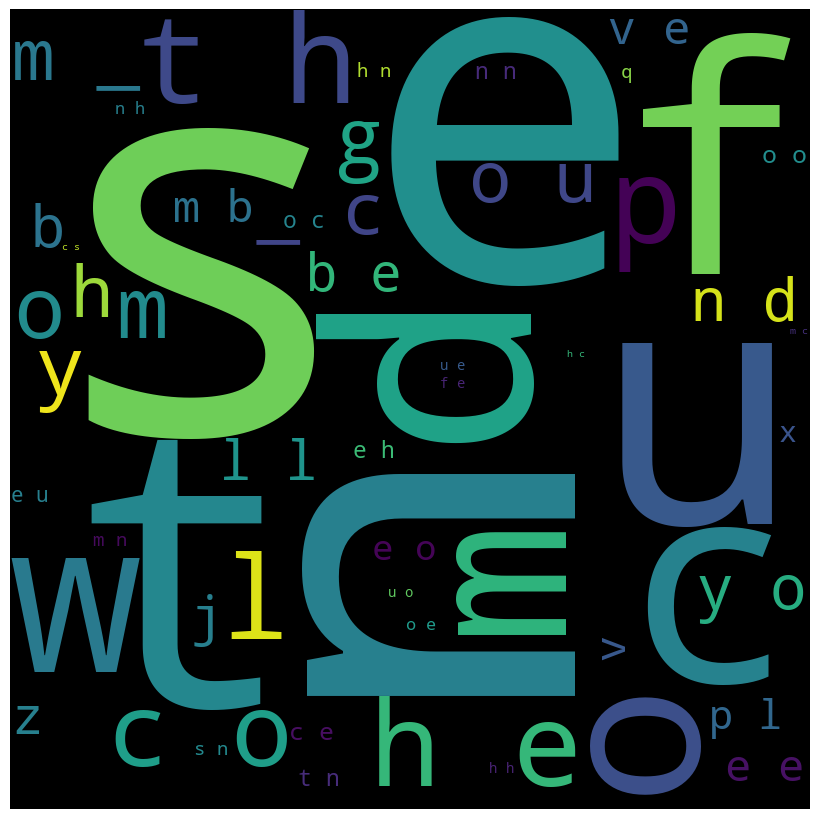

In [48]:
import matplotlib.pyplot as plt# Convert the lemmatized text data into a single string
text = ' '.join(df['lemmatized_text'].apply(lambda x: ' '.join(x)))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='black', min_font_size=10).generate(text)

# Display the WordCloud
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


In [49]:
clean_df = df[['clean_text']]

In [50]:
clean_df.to_csv('cleaned_safaricom_twitter.csv', sep=',', index=False)